https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [1]:
import pandas as pd

In [2]:
# carga los datos de data/temps.csv
df = pd.read_csv("data/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [4]:
# decribe
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [5]:
# valores unicos de la columna week
df["week"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [8]:
# valores de la columna week
df["week"].values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

ESTO ES UN CODIGO PARA CAMBIAR CATEGORIAS A VALORES DE FORMA AUTOMATICA. ESTO COGE TODOS ESOS VALORES UNICOS DE WEEK Y LES ASIGNA UN NUMERO A CADA UNO. OJO!! NO TIENE PORQUE SER LUNES 1, MARTES 2, MIERCOLES 3 AND SO ON

In [9]:
# usamos todos los datos (sin train ni test) pero esto habria que negociarlo...
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['week'])
le.transform(df['week'])

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

OTRA FORMA SERIA HACER COLUMNAS DUMMIES:

In [10]:
pd.get_dummies(df['week'])

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,True,False,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False
3,False,True,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
343,False,False,False,False,False,True,False
344,False,False,False,False,False,False,True
345,False,False,False,False,True,False,False
346,True,False,False,False,False,False,False


PERO AL FINAL, USAMOS LA FORMA "MANUAL" 

In [11]:
#Reemplaza el valor de la columna week con un diccionario
my_dict = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}

df['week'] = df['week'].replace(my_dict)

C:\Users\Marta\AppData\Local\Temp\ipykernel_5452\2500110800.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week'] = df['week'].replace(my_dict)


In [12]:
df

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


SI LOS DATOS SON MUY VARIABLES, A VECES INTERESA MODIFICAR UNA COLUMNA POR UN AGREGADO.
OS ACORDAIS DE LOS AGREGADOS? AQUI SE PIDE AGREGAR TEMPERATURA POR MES USANDO LA MEDIA:

In [17]:
months_g = df.groupby("month")["temp_1"].mean().reset_index()
months_g

,month,temp_1
0,1,49.677419
1,2,54.115385
2,3,56.483871
3,4,66.433333
4,5,68.838710
5,6,73.233333
6,7,76.225806
7,8,77.947368
8,9,70.428571
9,10,63.900000


ESTO LO DEJO. LO QUE HACEMOS ES UN JOIN PARA AGREGAR LA COLUMNA DE LA MEDIA MENSUAL AL DATO ORIGINAL
RECORDAD QUE NOS GENERARA UNA COLUMNA TEMP_1_X Y TEMP_1_Y POR QUE EL NOMBRE ESTA REPE

In [18]:
df = df.merge(months_g, on='month')

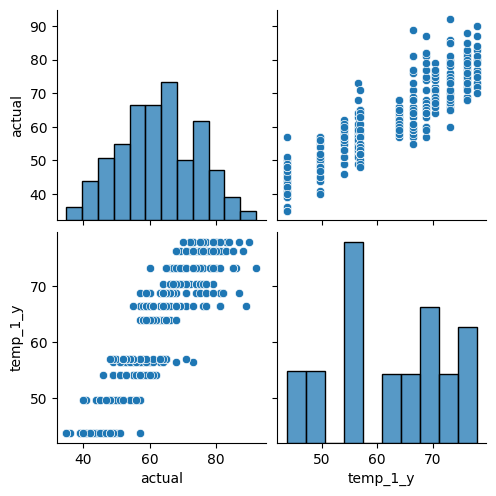

In [19]:
import seaborn as sns
sns.pairplot(df[['actual','temp_1_y']])

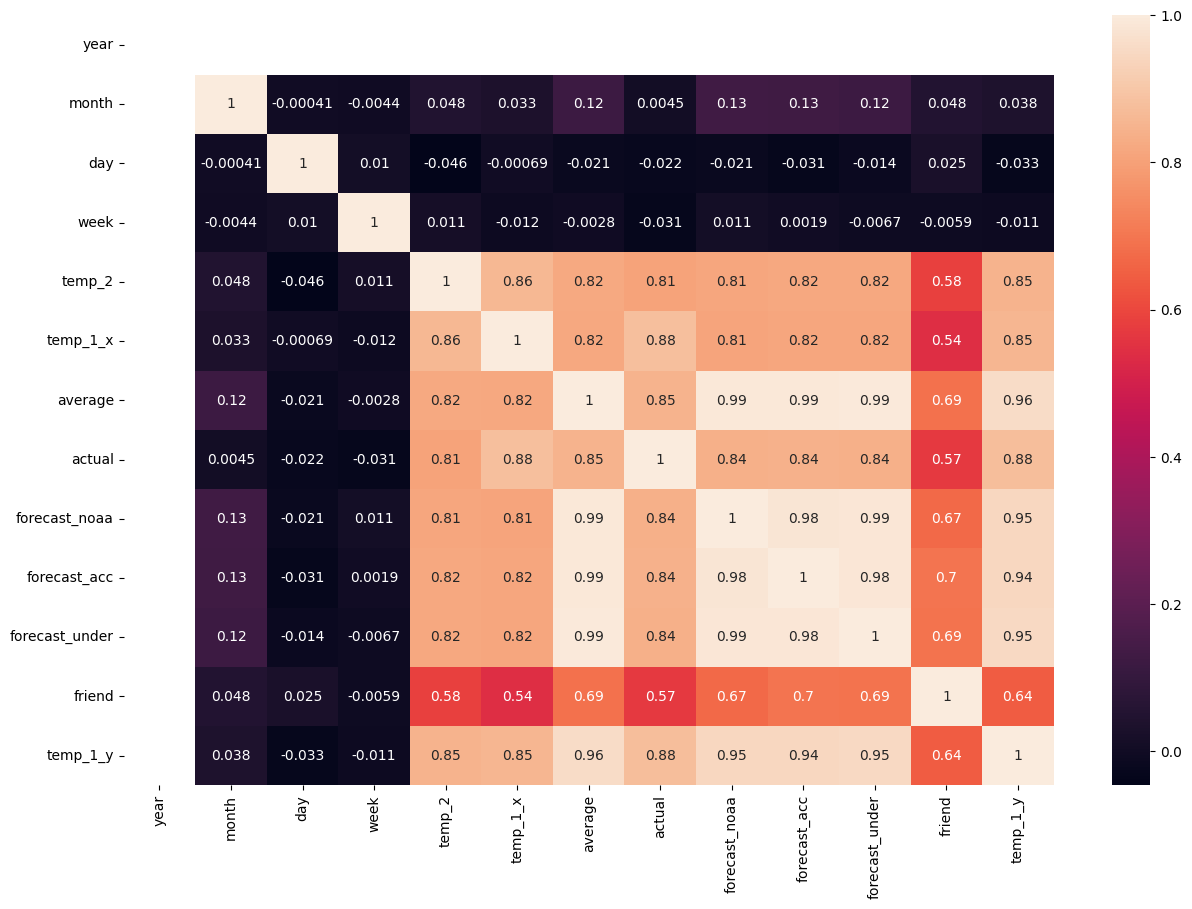

In [20]:
# HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True);

### 3. Divide en train y test

HACEMOS UN TRAIN TEST SPLIT DONDE QUITAMOS LAS COLUMNAS ['year','day','week'] Y USAMOS ACTUAL COMO TARGET

In [57]:
df.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1_x', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y'],
      dtype='object')

In [58]:
# train_test_split
X = df.loc[:,['month', 'temp_2', 'temp_1_x', 'average',
        'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'temp_1_y']]
y = df["actual"]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
print("X_train", X_train.shape)
print("X_train", X_test.shape)
print("X_train", y_train.shape)
print("X_train", y_test.shape)

X_train (278, 9)
X_train (70, 9)
X_train (278,)
X_train (70,)


### 4. Entrena el modelo


In [131]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42, max_depth=16)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=16, random_state=42)

In [132]:
X.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [133]:
# muestra la feature importance del modelo
tree_reg.feature_importances_

array([0.00879245, 0.01458638, 0.19171781, 0.71568518, 0.01678188,
       0.01200317, 0.0089906 , 0.02986361, 0.00157892])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [134]:
y_pred = tree_reg.predict(X_test)
y_pred

array([45., 59., 60., 57., 71., 74., 75., 61., 69., 64., 40., 52., 84.,
       57., 57., 63., 60., 49., 73., 74., 68., 62., 51., 68., 71., 57.,
       54., 63., 55., 85., 54., 57., 60., 61., 57., 59., 40., 67., 57.,
       52., 62., 76., 60., 87., 76., 60., 59., 65., 75., 60., 71., 40.,
       55., 48., 55., 83., 92., 58., 63., 59., 69., 66., 53., 64., 64.,
       81., 67., 74., 72., 53.])

In [135]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


In [136]:
print("Coeficiente determinación", r2_score(y_train, tree_reg.predict(X_train)))
print("MAE", mean_absolute_error(y_train, tree_reg.predict(X_train)))
print("MAPE", mean_absolute_percentage_error(y_train, tree_reg.predict(X_train)))
print("MSE", mean_squared_error(y_train, tree_reg.predict(X_train)))
print("RMSE", np.sqrt(mean_squared_error(y_train, tree_reg.predict(X_train))))

Coeficiente determinación 1.0
MAE 0.0
MAPE 0.0
MSE 0.0
RMSE 0.0


### 6. Representa el árbol de decision

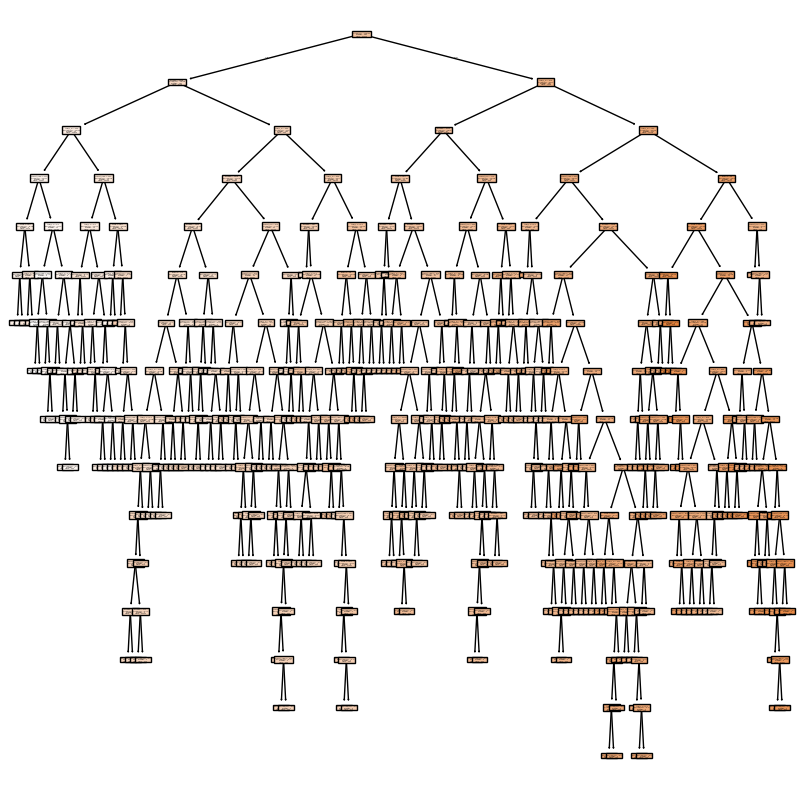

In [137]:
import sklearn
plt.figure(figsize=(10,10))

sklearn.tree.plot_tree(tree_reg,
               feature_names=X.columns,
               filled = True);

# SI LO HABEIS HECHO BIEN, ENTENDEREIS PORQUE USAMOS max_depth PARA CAMBIAR la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [138]:
from sklearn.tree import DecisionTreeRegressor
tree_reg3 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg3.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [139]:
y_pred = tree_reg3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.8229004513697751
MAE 3.5894084176692873
MAPE 0.05685713479124284
MSE 20.935660498879418
RMSE 4.575550294650843


### 9. Vuelve a representar su árbol

<Figure size 1500x1500 with 0 Axes>

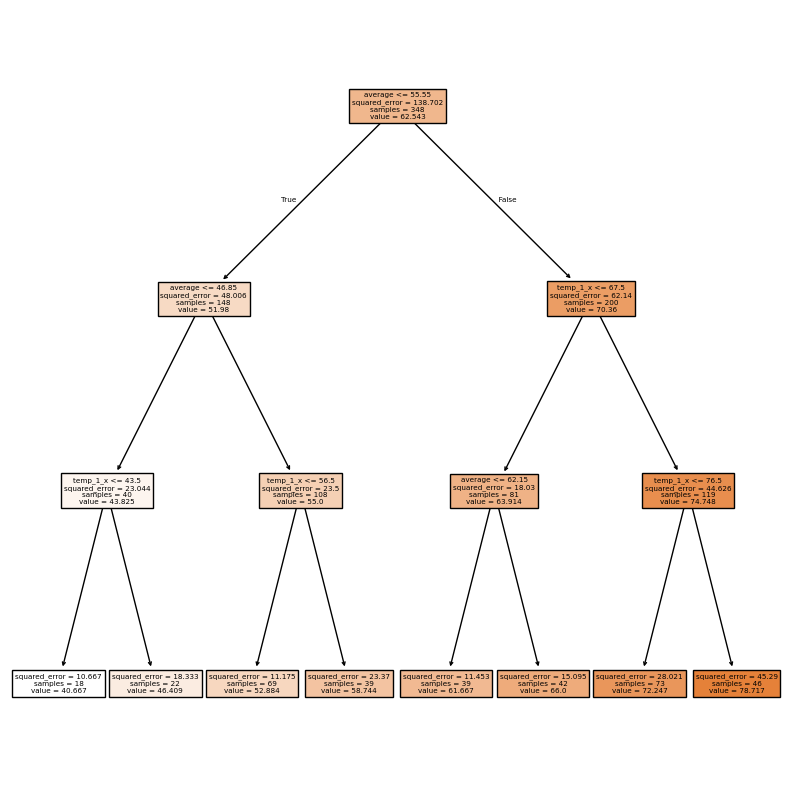

In [140]:
plt.figure(figsize=(15,15))
plt.figure(figsize=(10,10))

sklearn.tree.plot_tree(tree_reg3,
               feature_names=X.columns,
               filled = True);

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [141]:
# importancias
tree_reg3.feature_importances_

array([0.        , 0.        , 0.19667863, 0.80332137, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [142]:
# columnas de X_train
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [144]:
pd.DataFrame({'features': X_train.columns, 'importances': tree_reg3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
3,average,0.803321
2,temp_1_x,0.196679
0,month,0.000000
1,temp_2,0.000000
4,forecast_noaa,0.000000
5,forecast_acc,0.000000
6,forecast_under,0.000000
7,friend,0.000000
8,temp_1_y,0.000000


FIJAOS QUE SOLO USA 3 COLUMNAS...

In [156]:
# repetimos train test split pero solo nos quedamos las columnas que sirven para algo ['temp_1_x','average','forecast_under']
X = df.loc[:, ['temp_1_x','average','forecast_under']]
y = df["actual"]


In [157]:
tree_new = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_new.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [158]:
y_pred =tree_new.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- forecast_acc
- forecast_noaa
- friend
- month
- temp_1_y
- ...


In [71]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

VAMOS A TRANSFORMAR UN PROBLEMA DE REGRESION EN CLASIFICACION. GENERAREMOS UNA CLASE DONDE PONDREMOS 1 SI LA TEMPERATURA PASA DE 59 (GRADOS FAHRENHEIT), Y SI NO 0.

In [159]:
df['target_clas'] = np.where(df['actual']>59,1,0)
df[['actual','target_clas']].head()

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<Axes: >

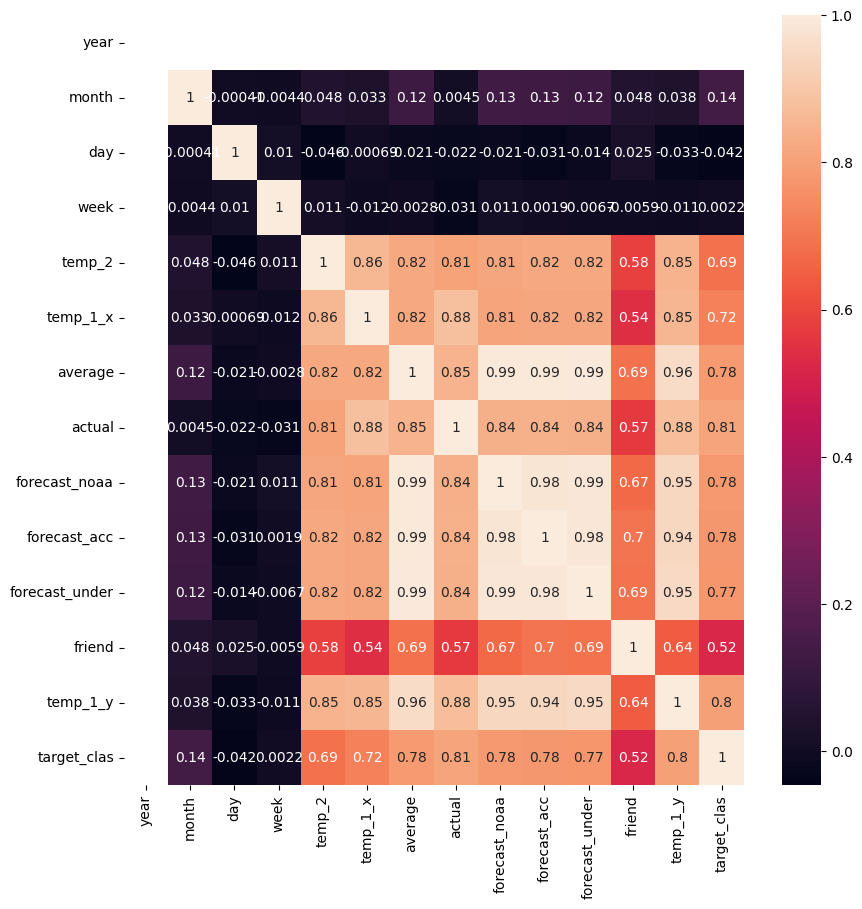

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [161]:
df['target_clas'].value_counts()

target_clas
1    204
0    144
Name: count, dtype: int64

In [162]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [ ]:
# ENRTRENA UN MODELO DE CLASIFICACION LLAMADO dtc

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
# dtc feature importance

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
# accuracy de dtc en test

0.9

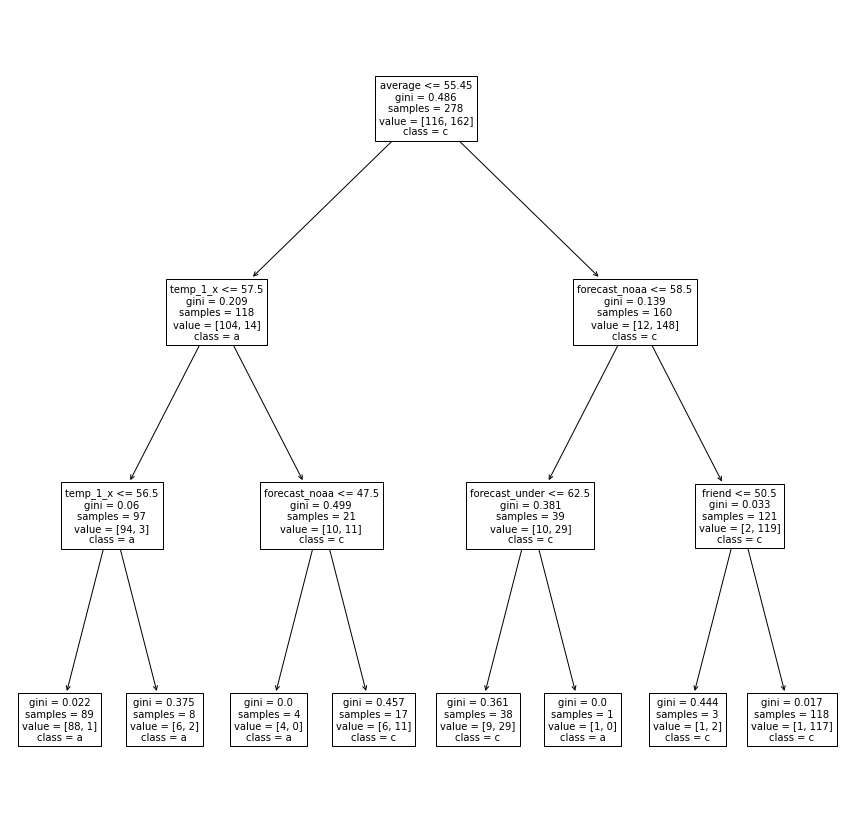

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

COMPARA LA ACCURACY CON UN LOGISTIC REGRESSOR A PELO

In [95]:
from sklearn.linear_model import LogisticRegression

# lr
# lr.fit
# accuracy_acore(..., ...)

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

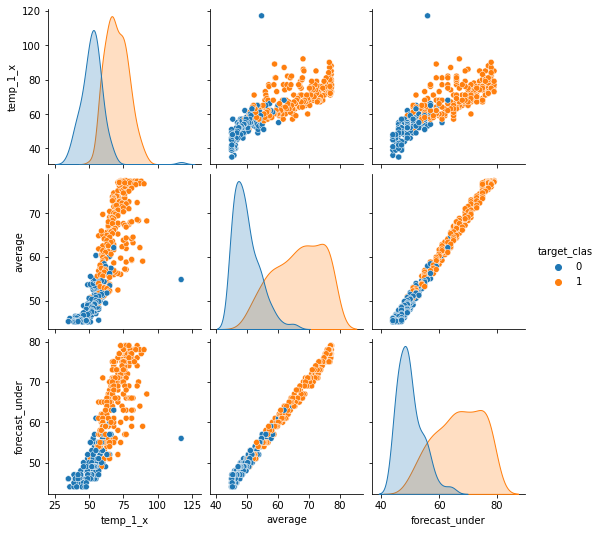

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')

### 12. BONUS TRACK: Repite el experimEnto con un un nuevo modelo `RandomForestClassifier` . A lo facil

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc = ...

RandomForestClassifier(max_depth=3)

In [99]:
accuracy_score(y_test,rfc.predict(X_test))

0.9428571428571428